Write Python code that can create a CSV containing 10 columns of text data​.

Each entry should be between 5 and 20 characters​.

Generate  files of size {0.1, 1, 5, 10, 100, 500} MB of data​.

Measure how much time it takes to write the files to disk. Do not include the time used in creating the random entries.​

Repeat the above test three times​.

Measure how much time it takes for your computer to load the data into a Pandas dataframe.​

Plot both the write times and load times versus file size​.

Submit your python notebook (.ipynb file) containing the code for the experiment and the results. Results are a table of values and plots. ​

In [1]:
import sys
print(sys.version)
import pandas
print('pandas',pandas.__version__)
import time
from faker import Faker
fake = Faker()
import os
import matplotlib.pyplot as plt

# explore random values for the row entries

In [3]:
fake.name()

'Thomas Tyler'

In [4]:
fake.ascii_email()

'maureenreeves@gmail.com'

In [5]:
fake.city()

'Wilkersonhaven'

In [6]:
fake.company()

'Higgins, Williams and Walsh'

In [7]:
fake.country()

'Norfolk Island'

In [8]:
fake.date()

'1977-06-09'

In [9]:
fake.day_of_month()

'15'

In [10]:
fake.domain_name()

'cunningham.com'

We can store the output to a dictionary

In [11]:
my_row={}
my_row['name']=fake.name()
my_row['date']=fake.date()
my_row['domain name']=fake.domain_name()
my_row['day of month']=fake.day_of_month()
my_row['day of week']=fake.day_of_week()
my_row['country']=fake.country()
my_row['company']=fake.company()
my_row['city']=fake.city()
my_row['email']=fake.ascii_email()
my_row['bank']=fake.bank_country()
my_row

{'name': 'Robin Martinez',
 'date': '1992-01-25',
 'domain name': 'anderson-collins.com',
 'day of month': '04',
 'day of week': 'Thursday',
 'country': 'Uzbekistan',
 'company': 'Bennett, Camacho and Hanson',
 'city': 'Petersonside',
 'email': 'kathleen74@howard.com',
 'bank': 'GB'}

# create dataframe containing random data

In [12]:
df = pandas.DataFrame()
for i in range(5):
    df = df.append(my_row, ignore_index=True)
df

,bank,city,company,country,date,day of month,day of week,domain name,email,name
0,GB,Petersonside,"Bennett, Camacho and Hanson",Uzbekistan,1992-01-25,04,Thursday,anderson-collins.com,kathleen74@howard.com,Robin Martinez
1,GB,Petersonside,"Bennett, Camacho and Hanson",Uzbekistan,1992-01-25,04,Thursday,anderson-collins.com,kathleen74@howard.com,Robin Martinez
2,GB,Petersonside,"Bennett, Camacho and Hanson",Uzbekistan,1992-01-25,04,Thursday,anderson-collins.com,kathleen74@howard.com,Robin Martinez
3,GB,Petersonside,"Bennett, Camacho and Hanson",Uzbekistan,1992-01-25,04,Thursday,anderson-collins.com,kathleen74@howard.com,Robin Martinez
4,GB,Petersonside,"Bennett, Camacho and Hanson",Uzbekistan,1992-01-25,04,Thursday,anderson-collins.com,kathleen74@howard.com,Robin Martinez


Rather than using the same row repeatedly, call a function per row

In [13]:
def create_row():
    """
    create a dictionary containing fake entries
    """
    my_row={}
    my_row['name']=fake.name()
    my_row['date']=fake.date()
    my_row['domain name']=fake.domain_name()
    my_row['day of month']=fake.day_of_month()
    my_row['day of week']=fake.day_of_week()
    my_row['country']=fake.country()
    my_row['company']=fake.company()
    my_row['city']=fake.city()
    my_row['email']=fake.ascii_email()
    my_row['bank']=fake.bank_country()
    return my_row

In [14]:
create_row()

{'name': 'Megan Carpenter',
 'date': '1976-03-07',
 'domain name': 'rocha.org',
 'day of month': '15',
 'day of week': 'Wednesday',
 'country': 'Mozambique',
 'company': 'Chen-Davis',
 'city': 'Gonzalesshire',
 'email': 'heather32@hotmail.com',
 'bank': 'GB'}

Populate a dataframe using the dictionary

In [40]:
df = pandas.DataFrame()
num_rows=5
for indx in range(num_rows):
    my_row = create_row()
    df = df.append(my_row, ignore_index=True)
df

,bank,city,company,country,date,day of month,day of week,domain name,email,name
0,GB,Brittanychester,"Avila, Luna and Russell",Argentina,2016-04-29,04,Friday,wilson.com,upatton@smith.com,Joshua Buchanan
1,GB,East Robertburgh,Edwards Ltd,Chad,2013-10-18,28,Monday,hernandez.com,gomezpatrick@gmail.com,Catherine Hayes
2,GB,Mcgeebury,"Martin, Sanders and Edwards",Puerto Rico,2008-06-24,05,Thursday,porter-liu.info,vmack@gmail.com,Jessica Garrett
3,GB,Roberttown,Espinoza-Burnett,Saint Martin,2011-02-14,20,Monday,martinez-gray.com,kristin44@smith-rasmussen.com,Ashley King
4,GB,Schmidtton,Jones Ltd,Saint Kitts and Nevis,1990-11-05,19,Friday,hansen.com,ashleypatel@gmail.com,Lisa Jackson


how long does writing the dataframe to CSV on disk take?

In [43]:
start = time.time()
df.to_csv('filename.csv')
print(time.time() - start,'seconds')

print(os.path.getsize("filename.csv")/1000000.0,'MB')

0.025088787078857422 seconds
0.000686 MB


create a larger dataframe

In [50]:
start = time.time()
df = pandas.DataFrame()
num_rows=850
for indx in range(num_rows):
    my_row = create_row()
    df = df.append(my_row, ignore_index=True)
print(round(time.time() - start,2),'seconds')

6.900719881057739 seconds


The above method is slow because `df.append()` is used inside the loop, causing memory allocation to be invoked

Compare

In [ ]:
# use df.append inside a loop: slow
start_time=time.time()
df_text = pandas.DataFrame()
num_rows=850 # 850 is ~1MB
for indx in range(num_rows):
    df_text = df_text.append({'name':fake.name(),
                    'date':fake.date(),
                    'domain name':fake.domain_name(),
                    'day of month':fake.day_of_month(),
                    'day of week':fake.day_of_week(),
                    'country':fake.country(),
                    'company':fake.company(),
                    'city':fake.city(),
                    'email':fake.ascii_email(),
                    'bank':fake.bank_country()}, ignore_index=True)
print('elapsed',round(time.time()-start_time,2),'seconds')
print(df_text.shape)
df_text.head()

In [ ]:
# create a list of dictionaries: fast
start_time=time.time()
list_of_dicts=[]
num_rows=850 # 850 is ~1MB
for indx in range(num_rows):
    list_of_dicts.append({'name':fake.name(),
                    'date':fake.date(),
                    'domain name':fake.domain_name(),
                    'day of month':fake.day_of_month(),
                    'day of week':fake.day_of_week(),
                    'country':fake.country(),
                    'company':fake.company(),
                    'city':fake.city(),
                    'email':fake.ascii_email(),
                    'bank':fake.bank_country()})
    
df_text = pandas.DataFrame(list_of_dicts)

print('elapsed',round(time.time()-start_time,2),'seconds')
df_text.head()

how long does it take to write that dataframe to disk? <BR>
And how big is the CSV on disk?

In [51]:
start = time.time()
df.to_csv('filename.csv')
print(time.time() - start,'seconds')
print(os.path.getsize("filename.csv")/1000000.0,'MB')

0.05573892593383789 seconds
0.104566 MB


what if the dataframe is doubled in size?

In [52]:
df2 = df.copy()
df = pandas.concat([df2,df])
df.shape

(1700, 10)

In [53]:
start = time.time()
df.to_csv('filename.csv')
print(time.time() - start,'seconds')
print(os.path.getsize("filename.csv")/1000000.0,'MB')

0.08511114120483398 seconds
0.209052 MB


file is twice as big, as expected

# create dataframe faster than brute force

In [54]:
start = time.time()
df = pandas.DataFrame()
num_rows=850
for indx in range(num_rows):
    my_row = create_row()
    df = df.append(my_row, ignore_index=True)

list_of_df = []
for indx in range(10): # 10 yields 1MB file
#for indx in range(100): # 100 yields 10MB file
#for indx in range(5000): # 5000 yields 500MB file
    list_of_df.append(df.copy())
df = pandas.concat(list_of_df)
print(df.shape)
print(time.time() - start,'seconds to create data frame in memory')

(8500, 10)
8.612895250320435 seconds to create data frame in memory


In [55]:
start = time.time()
df.to_csv('filename.csv')
print(df.shape)
print(time.time() - start,'seconds')
print(os.path.getsize("filename.csv")/1000000.0,'MB file on disk')

(8500, 10)
0.23604512214660645 seconds
1.04338 MB file on disk


# test scaling

In [26]:
def create_dataframe_of_size(size_of_df_in_MB):
    df = pandas.DataFrame()
    num_rows=850
    for indx in range(num_rows):
        my_row = create_row()
        df = df.append(my_row, ignore_index=True)

    list_of_df = []
    for indx in range(int(size_of_df_in_MB*10)): 
        list_of_df.append(df.copy())
    df = pandas.concat(list_of_df)
    return df

### parameters for scale tests

In [27]:
list_of_file_sizes = [0.1, 1, 5, 10, 100, 500]
number_of_trials=3

### nested loops for write tests

In [28]:
results_time_dict={}
results_disk_size_dict={}
for desired_file_size in list_of_file_sizes:
    trial_reslt_list_time=[]
    trial_reslt_list_filesize=[]
    for trial_indx in range(number_of_trials):
        # create data frame 
        df = create_dataframe_of_size(desired_file_size)
        # write test
        start = time.time()
        df.to_csv('filename.csv')
        elapsed_time=time.time() - start
        actual_file_size=os.path.getsize("filename.csv")/1000000.0
        trial_reslt_list_time.append(elapsed_time)
        trial_reslt_list_filesize.append(actual_file_size)
    average_write_time = sum(trial_reslt_list_time)/number_of_trials
    average_filesize=sum(trial_reslt_list_filesize)/number_of_trials
    results_time_dict[average_filesize]=average_write_time
    print('average of ',average_write_time,'seconds for',desired_file_size,'MB')

0.030185937881469727 seconds for 0.1 MB
0.17177987098693848 seconds for 1 MB
0.8669099807739258 seconds for 5 MB
2.489792585372925 seconds for 10 MB
17.446888208389282 seconds for 100 MB
81.4829478263855 seconds for 500 MB


In [32]:
results_time_dict

{0.10388833333333332: 0.1339114507039388,
 1.0426399999999998: 0.1988981564839681,
 5.201863333333334: 0.8179066181182861,
 10.417679999999999: 1.9293036460876465,
 104.01207999999998: 18.083478053410847,
 520.4184133333333: 77.22431707382202}

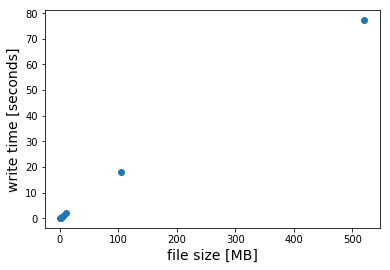

In [33]:
_=plt.scatter(results_time_dict.keys(),results_time_dict.values())
_=plt.xlabel('file size [MB]',fontsize=14)
_=plt.ylabel('write time [seconds]',fontsize=14)

# read and write scaling

In [36]:
results_write_dict={}
results_read_dict={}
for desired_file_size in list_of_file_sizes:
    trial_reslt_list_write_time=[]
    trial_reslt_list_write_filesize=[]
    trial_reslt_list_read_time=[]
    trial_reslt_list_read_filesize=[]
    start_trial=time.time()
    for trial_indx in range(number_of_trials):
        df = create_dataframe_of_size(desired_file_size)
        
        # write test
        start = time.time()
        df.to_csv('filename.csv')
        elapsed_time=time.time() - start
        actual_file_size=os.path.getsize("filename.csv")/1000000.0
        trial_reslt_list_write_time.append(elapsed_time)
        trial_reslt_list_write_filesize.append(actual_file_size)

        # clear the disk cache
        df2 = create_dataframe_of_size(1)
        df2.to_csv('filename2.csv')

        # read test
        start = time.time()
        df = pandas.read_csv('filename.csv')
        elapsed_time=time.time() - start
        actual_file_size=os.path.getsize("filename.csv")/1000000.0
        trial_reslt_list_read_time.append(elapsed_time)
        trial_reslt_list_read_filesize.append(actual_file_size)
        
    print(time.time() - start_trial,'seconds for',desired_file_size,'MB')
    average_write_time = sum(trial_reslt_list_write_time)/number_of_trials
    average_write_filesize=sum(trial_reslt_list_write_filesize)/number_of_trials
    results_write_dict[average_write_filesize]=average_write_time

    average_read_time = sum(trial_reslt_list_read_time)/number_of_trials
    average_read_filesize=sum(trial_reslt_list_read_filesize)/number_of_trials
    results_read_dict[average_read_filesize]=average_read_time

average of  0.05392559369405111 seconds for 0.1 MB
average of  0.1713709036509196 seconds for 1 MB
average of  0.843682607014974 seconds for 5 MB
average of  2.276759147644043 seconds for 10 MB
average of  12.700820922851562 seconds for 100 MB
average of  72.54429411888123 seconds for 500 MB


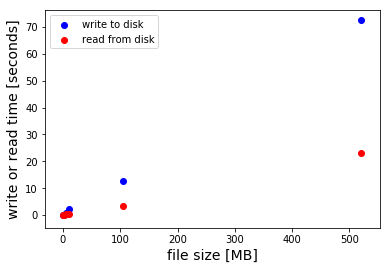

In [57]:
_=plt.scatter(results_write_dict.keys(),results_write_dict.values(),
              color='blue',label='write to disk')
_=plt.scatter(results_read_dict.keys(),results_read_dict.values(),
              color='red',label='read from disk')
ax = plt.gca()
ax.legend()
_=plt.xlabel('file size [MB]',fontsize=14)
_=plt.ylabel('write or read time [seconds]',fontsize=14)